In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# #이후 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,977 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [1]:
import warnings   
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np
import pandas as pd
import re

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [3]:
cd /content/drive/MyDrive/UBION_final_project/data

/content/drive/MyDrive/UBION_final_project/data


In [4]:
bc_auc = pd.read_csv('grid_result_auc.csv')

In [ ]:
check = bc_auc.drop_duplicates(subset = ['데이터프레임', 'train_test_split(Y/R)', '변수선택법','VIF(Y/N)'])

In [5]:
df = pd.read_csv('v7_final.csv', encoding = 'euc-kr')
feature = df.columns[8:]
sector = pd.DataFrame(feature)
sector.rename(columns={0:'feature'}, inplace=True)
sector['sector'] = 0
sector['sector'][:14] = '성장성'
sector['sector'][14:64] = '수익성'
sector['sector'][64:103] = '안정성'
sector['sector'][103:124] = '활동성'
sector['sector'][124:140] = '생산성'
sector['sector'][140:152] = '부가가치'
sector['sector'][152:160] = '투자지표'
sector['sector'][160:] = 'EBITDA지표'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
col_list = []
for idx, col in check.iterrows():
    if col['데이터프레임']=='diff_df':
        seleted_variables = col[7]
        seleted_variables = re.sub("\[|\]|\'|\'|", "",seleted_variables)
        seleted_variables = list(seleted_variables.split(', '))
        tmp = []
        for i in seleted_variables:
            tmp.extend(i[12:])
        col_list.extend(tmp)
    else:
        seleted_variables = col[7]
        seleted_variables = re.sub("\[|\]|\'|\'|", "",seleted_variables)
        seleted_variables = list(seleted_variables.split(', '))
        col_list.extend(seleted_variables)

sector_df = pd.DataFrame(col_list)

In [ ]:
print(cnt)

546


In [ ]:
sector_df = pd.DataFrame(col_list)
sector_df.rename(columns={0:'feature'}, inplace=True)
sector_df = pd.merge(sector_df, sector, on='feature', how='left')

In [ ]:
sector_df[sector_df['feature'].isin(['순운전자본비율', '유보액대비율', 'CASH FLOW 대 총자본비율', '총자본회전률'])]['feature'].value_counts()

순운전자본비율              5
CASH FLOW 대 총자본비율    3
유보액대비율               3
총자본회전률               1
Name: feature, dtype: int64

In [ ]:
count_df = sector_df.groupby('sector')['feature'].count().reset_index()
count_df

,sector,feature
0,EBITDA지표,7
1,부가가치,22
2,생산성,15
3,성장성,13
4,수익성,77
5,안정성,63
6,투자지표,4
7,활동성,16


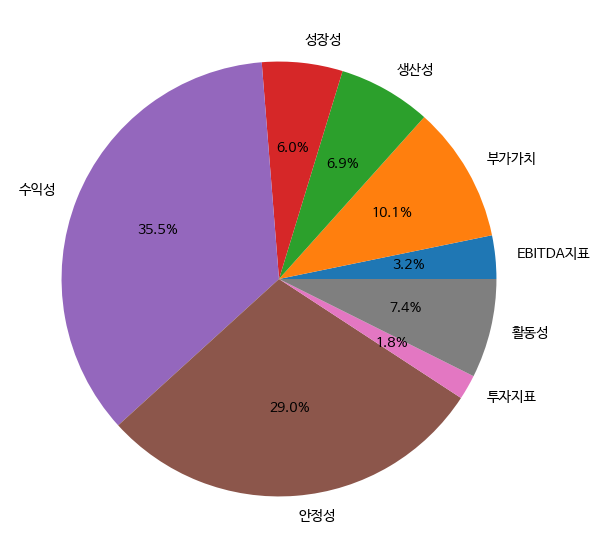

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(count_df['feature'], labels=count_df['sector'], autopct='%.1f%%', textprops={'fontsize': 14})
plt.show()

# 상위 16개 결과 seleted feature 분포

In [25]:
rf_check = pd.read_csv('grid_result_auc.csv')

In [26]:
rf_check.iloc[9,0]

'diff_df'

In [38]:
col_list = []

seleted_variables = rf_check.iloc[9,7]
seleted_variables = re.sub("\[|\]|\'|\'|", "",seleted_variables)
seleted_variables = list(seleted_variables.split(', '))
print(seleted_variables)
tmp = []
for i in seleted_variables:
    tmp.append(i[12:])
col_list.extend(tmp)

['growth_rate_수지비율', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_부채비율', 'growth_rate_비유동부채비율', 'growth_rate_유보액대비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_EBITDA(백만원)', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_자기자본증가율', 'growth_rate_총자본사업이익률', 'growth_rate_총자본영업이익률', 'growth_rate_총자본순이익률', 'growth_rate_자기자본영업이익률', 'growth_rate_자기자본순이익률', 'growth_rate_기업순이익률', 'growth_rate_경영자본영업이익률', 'growth_rate_경영자본순이익률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_순운전자본회전률', 'growth_rate_운전자본회전률']


In [39]:
col_list

['수지비율',
 '사내유보 대 자기자본비율',
 '적립금비율(재정비율)',
 '유동자산 대 비유동자산비율',
 '비유동비율',
 '비유동장기적합률',
 '부채비율',
 '비유동부채비율',
 '유보액대비율',
 '종업원1인당 매출액(백만원)',
 'EBITDA(백만원)',
 'EBITDA/매출액(%)',
 '자기자본증가율',
 '총자본사업이익률',
 '총자본영업이익률',
 '총자본순이익률',
 '자기자본영업이익률',
 '자기자본순이익률',
 '기업순이익률',
 '경영자본영업이익률',
 '경영자본순이익률',
 'CASH FLOW 대 차입금비율',
 'CASH FLOW 대 총자본비율',
 '순운전자본회전률',
 '운전자본회전률']

In [41]:
sector_df = pd.DataFrame(col_list)
sector_df.rename(columns={0:'feature'}, inplace=True)
sector_df = pd.merge(sector_df, sector, on='feature', how='left')
sector_df

,feature,sector
0,수지비율,수익성
1,사내유보 대 자기자본비율,수익성
2,적립금비율(재정비율),수익성
3,유동자산 대 비유동자산비율,안정성
4,비유동비율,안정성
5,비유동장기적합률,안정성
6,부채비율,안정성
7,비유동부채비율,안정성
8,유보액대비율,안정성
9,종업원1인당 매출액(백만원),생산성


In [45]:
b = sector_df.groupby(['sector'])['feature'].count().reset_index()
b

,sector,feature
0,EBITDA지표,2
1,생산성,1
2,성장성,1
3,수익성,11
4,안정성,8
5,활동성,2


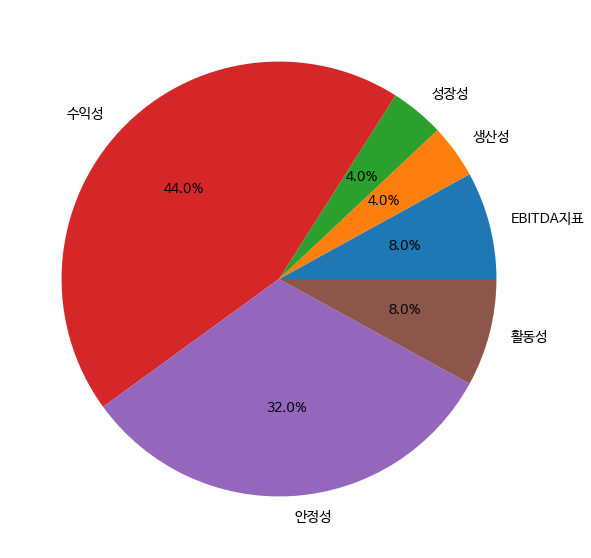

In [43]:
plt.figure(figsize=(10,10))
plt.pie(b['feature'], labels=b['sector'], autopct='%.1f%%', textprops={'fontsize': 14})
plt.show()

# 상위 16개 결과 seleted feature 분포